In [1]:
%matplotlib inline
from IPython.display import display, HTML
from analysis import Analysis
from models import *
analysis = Analysis('weather', title='03-FeaturesOther', logger=display)
analysis.load_data()

D:\Users\fjd10\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Now setting the features and predictor to just be the avg temperature value.

In [2]:
predictor = 'actual_mean_temp'
features = ['actual_min_temp', 'actual_max_temp', 'actual_precipitation']
analysis.set_feature_predictor_columns(features, predictor)
analysis.train_test_split()

'Number of train data points: 292'

'Number of test data points: 73'

Set some parameters that are used by some of the models

In [3]:
# The number of days to chunk inputs by
NUM_DAYS = 5

# 
NUM_FEATURES = len(analysis.features)

Going to try each different model.

# Raw Data

Raw Data means that the model simply takes the data as a sequence and no data manipulation is performed.

## ARIMA

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1827.791, BIC=1846.175, Fit time=1.869 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=1962.638, BIC=1977.345, Fit time=0.491 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1864.170, BIC=1878.877, Fit time=1.064 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=1829.085, BIC=1851.146, Fit time=2.055 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=1986.101, BIC=2000.808, Fit time=0.634 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=1831.230, BIC=1856.967, Fit time=6.520 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1811.604, BIC=1833.664, Fit time=2.369 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(0, 1, 1, 

'Train Error: 5.07417608657  Num NaN: 0'

'Test Error: 6.38998095112    Num NaN: 0'

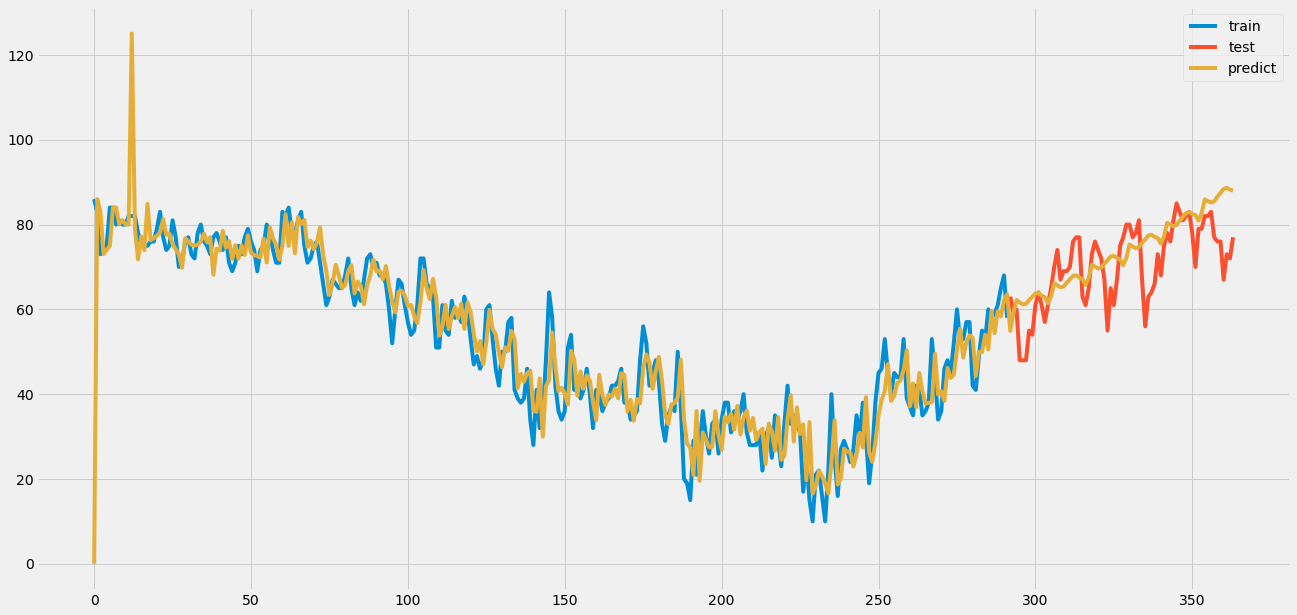

In [4]:
model = ARIMA(analysis, use_features=False)
analysis.run_model(model, name='ARIMA')

'Train Error: 4.13287671233  Num NaN: 0'

'Test Error: 4.51111111111    Num NaN: 0'

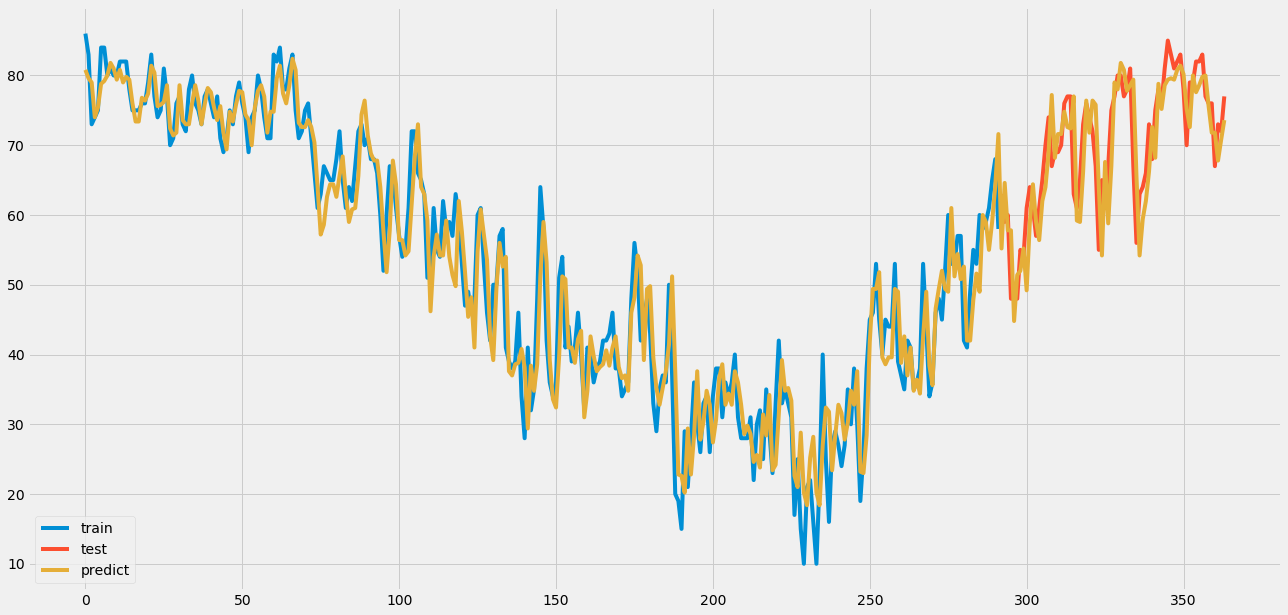

In [5]:
from sklearn.neighbors import KNeighborsRegressor
model = Regressor(analysis, KNeighborsRegressor)
analysis.run_model(model, name='KNN')

D:\Users\fjd10\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


'Train Error: 1.32044261134e+12  Num NaN: 0'

'Test Error: 1.80084226308e+12    Num NaN: 0'

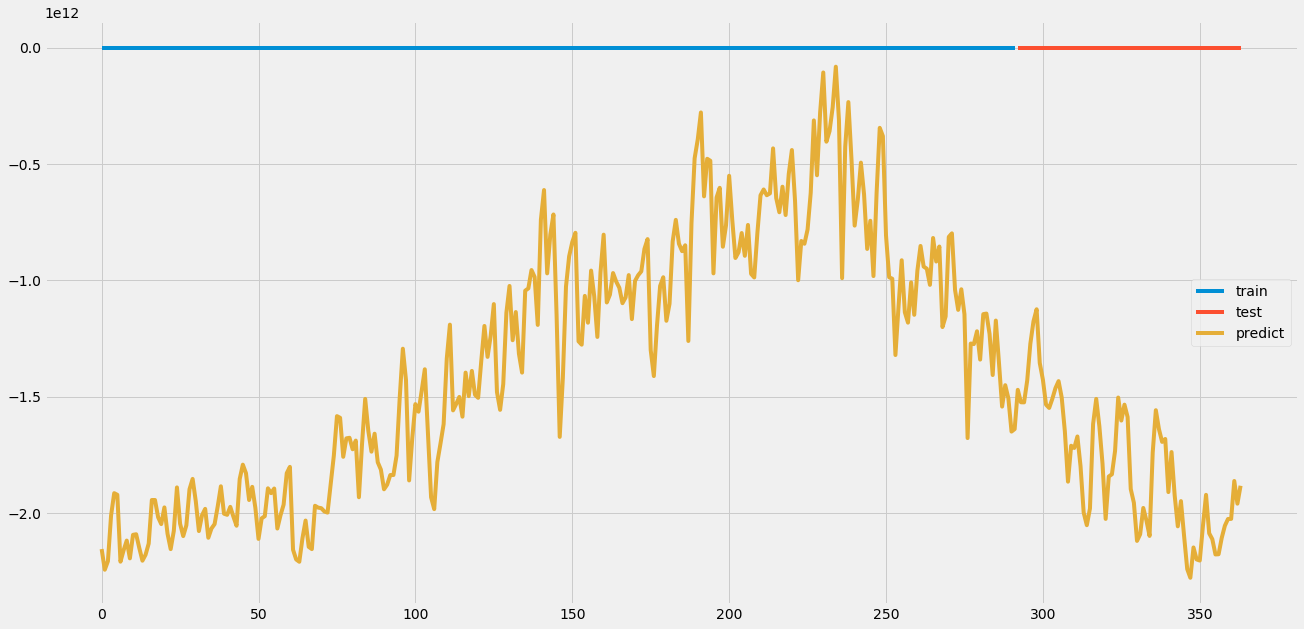

In [6]:
from sklearn.linear_model import SGDRegressor
model = Regressor(analysis, SGDRegressor)
analysis.run_model(model, name='SGD')

'Train Error: 2.04646934116  Num NaN: 0'

'Test Error: 4.73617724868    Num NaN: 0'

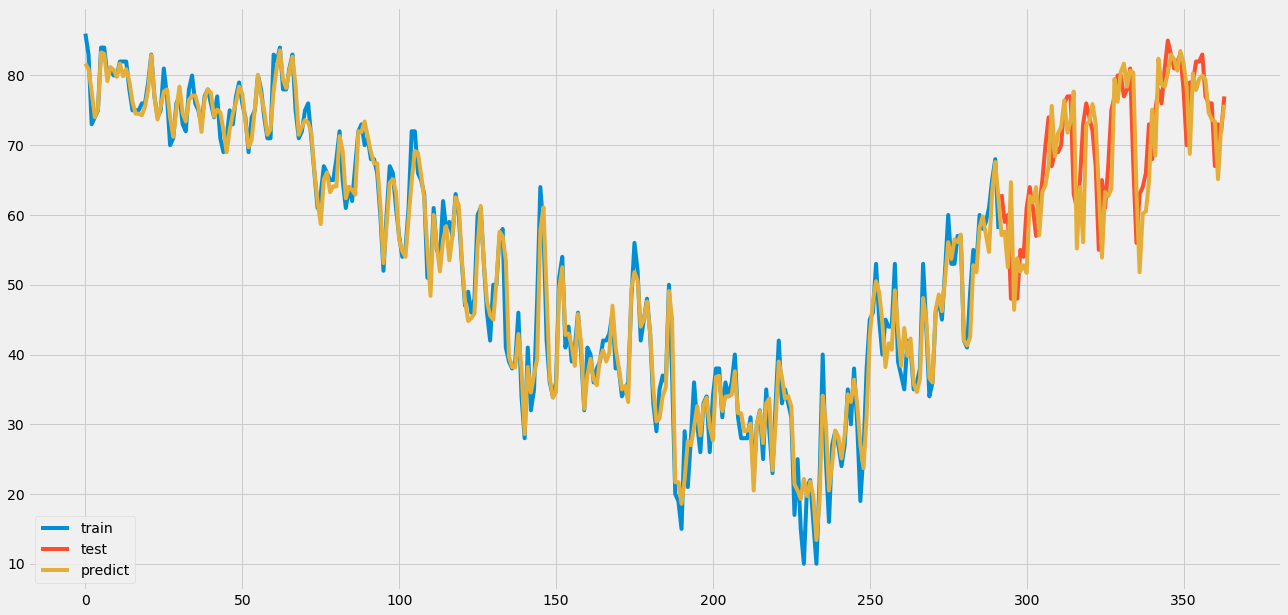

In [7]:
from sklearn.ensemble import RandomForestRegressor
model = Regressor(analysis, RandomForestRegressor)
analysis.run_model(model, name='RandomForest')

'Train Error: 4.48317932473  Num NaN: 0'

'Test Error: 5.06482815705    Num NaN: 0'

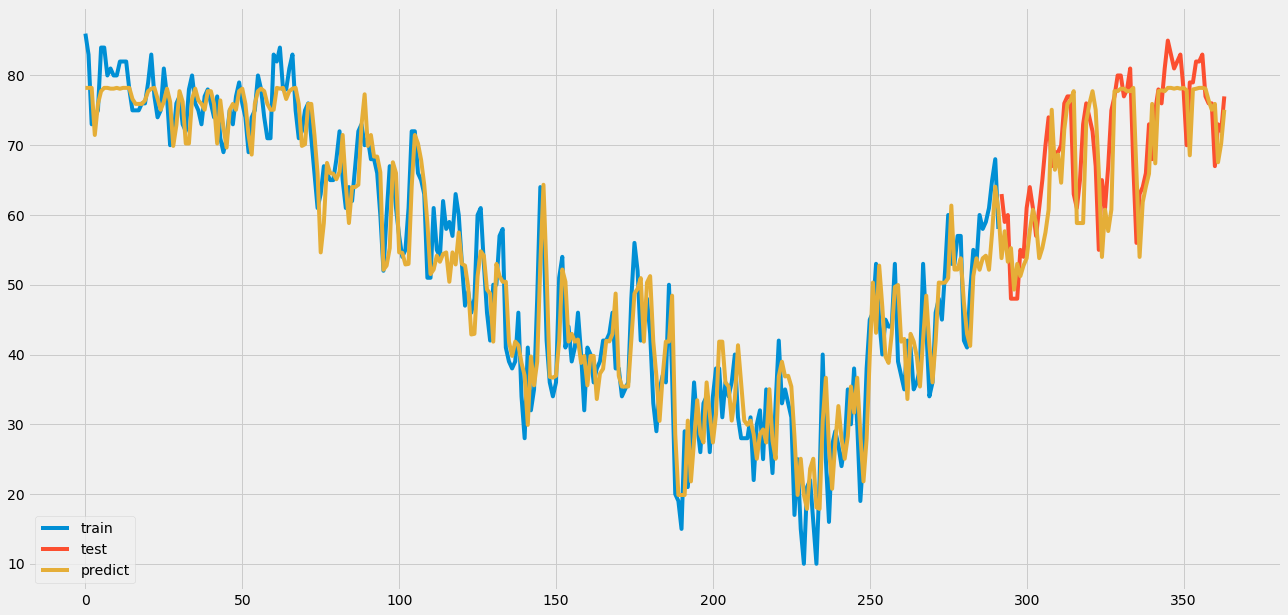

In [8]:
from sklearn.ensemble import AdaBoostRegressor
model = Regressor(analysis, AdaBoostRegressor)
analysis.run_model(model, name='AdaBoost')

'Train Error: 0.303870929752  Num NaN: 0'

'Test Error: 31.9160988566    Num NaN: 0'

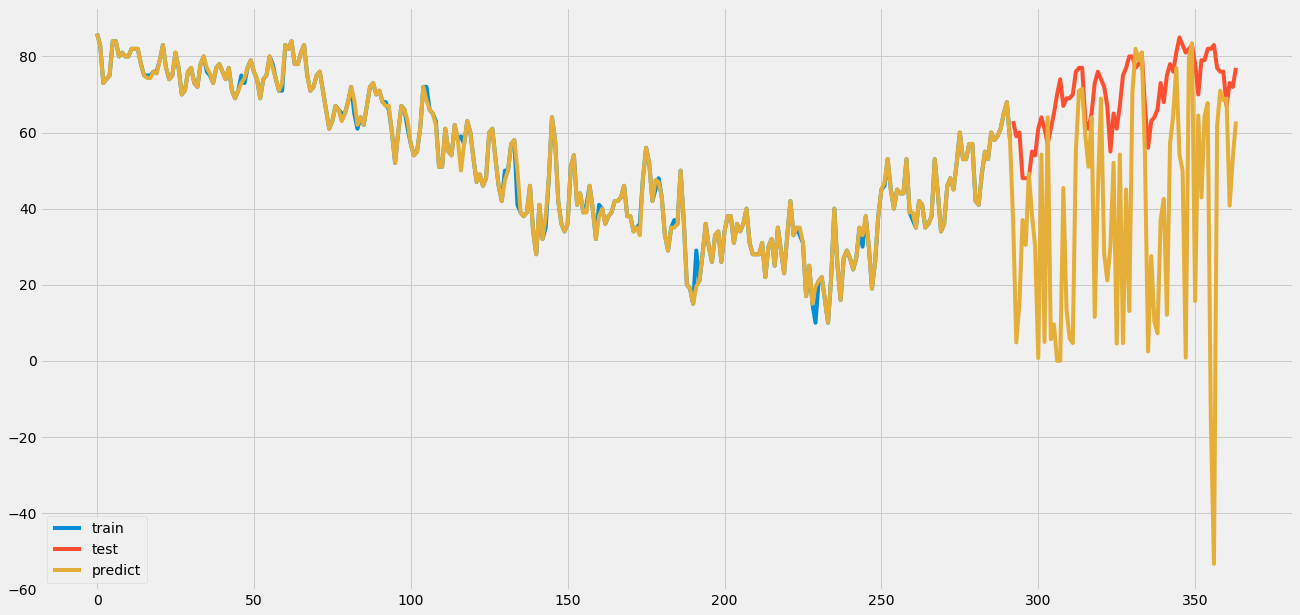

In [9]:
from sklearn.gaussian_process import GaussianProcessRegressor
model = Regressor(analysis, GaussianProcessRegressor)
analysis.run_model(model, name='GaussianProcess')

# Chunking Data

Now going to use models that require chunking.  We perform chunking by taking the time series:

x = (x0, x1, x2, x3, ...)
y = (x1, x2, x3, x4, ...)

and modifying it such that if the chunk parameter, c, is set to 3:

x = ((x0, x1, x2), (x1, x2, x3), (x2, x3, x4), ...)
y = (x3, x4, x5, ...)

This results in the first c values in not having a prediction and thus (Num NaN is > 0 and == c).



## LinearRegression

'Train Error: 5.57624418585  Num NaN: 5'

'Test Error: 6.32932107205    Num NaN: 5'

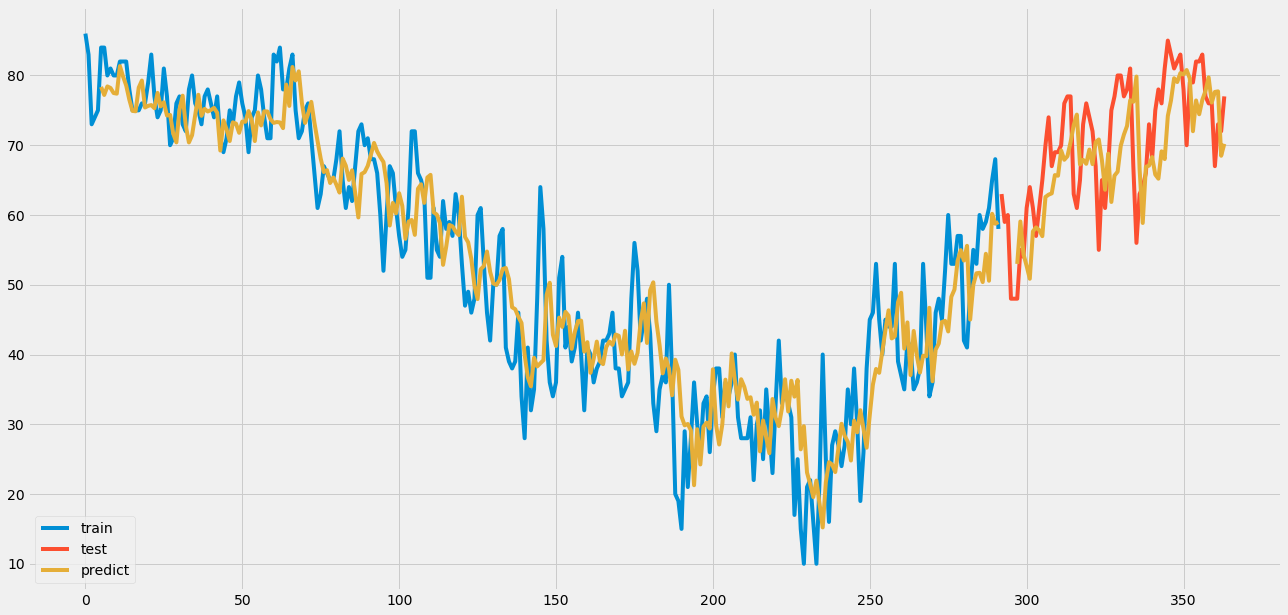

In [10]:
model = LinearRegression(analysis, num_days=NUM_DAYS)
analysis.run_model(model, name='LinearRegression')

## FeedForward Neural Network

Using TensorFlow backend.


Train on 287 samples, validate on 67 samples
Epoch 1/10
 - 1s - loss: 0.2210 - val_loss: 0.2683
Epoch 2/10
 - 0s - loss: 0.2042 - val_loss: 0.1507
Epoch 3/10
 - 0s - loss: 0.1941 - val_loss: 0.2900
Epoch 4/10
 - 0s - loss: 0.2171 - val_loss: 0.2621
Epoch 5/10
 - 0s - loss: 0.2134 - val_loss: 0.1470
Epoch 6/10
 - 0s - loss: 0.2089 - val_loss: 0.2606
Epoch 7/10
 - 0s - loss: 0.1994 - val_loss: 0.1499
Epoch 8/10
 - 0s - loss: 0.1945 - val_loss: 0.1891
Epoch 9/10
 - 0s - loss: 0.1952 - val_loss: 0.1881
Epoch 10/10
 - 0s - loss: 0.1965 - val_loss: 0.2923


'Train Error: 16.0097799002  Num NaN: 5'

'Test Error: 21.9192404106    Num NaN: 5'

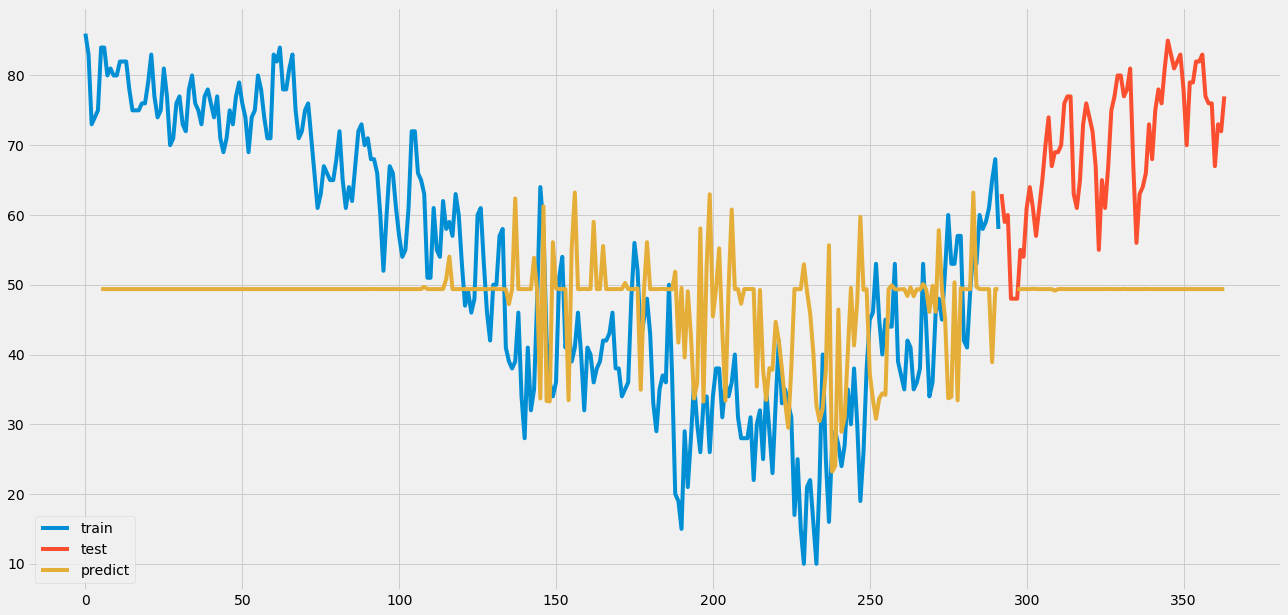

In [11]:
from keras.models import Sequential
from keras import optimizers
from keras import layers

nn = Sequential()
nn.add(layers.Dense(25, activation='tanh',
                    batch_input_shape=(None, NUM_DAYS * NUM_FEATURES)))
nn.add(layers.Dense(10, activation='tanh'))
nn.add(layers.Dense(1, activation='tanh'))
nn.compile(loss='mae', optimizer='sgd')

model = FNN(analysis, nn, num_days=NUM_DAYS)
analysis.run_model(model, name='FNN')


## Recurrent Neural Network with Single Output

Single output means that the chunked timesteps are input and then the final output of the RNN is used as the prediction.

Train on 287 samples, validate on 67 samples
Epoch 1/10
 - 1s - loss: 0.2485 - val_loss: 0.3890
Epoch 2/10
 - 0s - loss: 0.2466 - val_loss: 0.1177
Epoch 3/10
 - 0s - loss: 0.2314 - val_loss: 0.2926
Epoch 4/10
 - 0s - loss: 0.2412 - val_loss: 0.2157
Epoch 5/10
 - 0s - loss: 0.2375 - val_loss: 0.3498
Epoch 6/10
 - 0s - loss: 0.2311 - val_loss: 0.2804
Epoch 7/10
 - 0s - loss: 0.2496 - val_loss: 0.2500
Epoch 8/10
 - 0s - loss: 0.2395 - val_loss: 0.1622
Epoch 9/10
 - 0s - loss: 0.2400 - val_loss: 0.1706
Epoch 10/10
 - 0s - loss: 0.2356 - val_loss: 0.2539


'Train Error: 16.4637494237  Num NaN: 5'

'Test Error: 19.0393938662    Num NaN: 5'

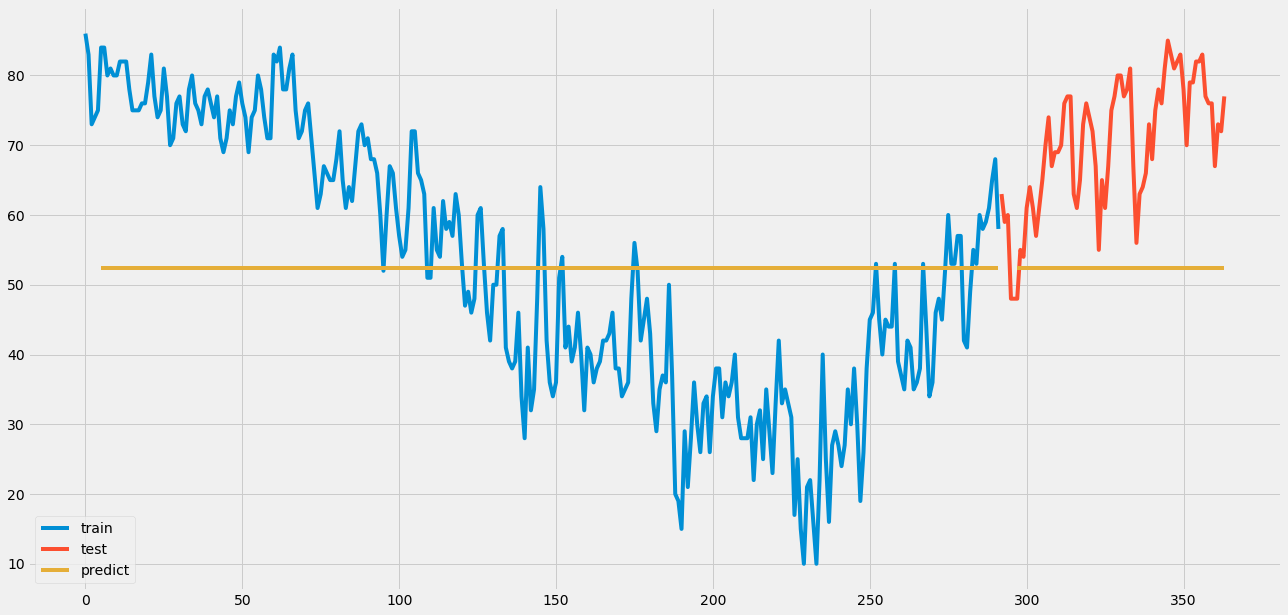

In [12]:
from keras.models import Sequential
from keras import optimizers
from keras import layers

mask_value = -9999

nn = Sequential()
nn.add(layers.Masking(mask_value=mask_value, input_shape=(NUM_DAYS, NUM_FEATURES)))
nn.add(layers.SimpleRNN(50, input_shape=(NUM_DAYS, NUM_FEATURES)))

nn.add(layers.Dense(1, activation='tanh'))
nn.add(layers.Dense(1, activation='linear'))
nn.compile(loss='mae', optimizer=optimizers.RMSprop(lr=0.1))
        
model = RNNSingle(analysis, nn, num_days=NUM_DAYS, mask_value=mask_value)
analysis.run_model(model, name='RNNSingle')

## Recurrent Neural Network with Multiple Outputs

Multiple outputs means that the chunked data is input and the output at each timestep is used.

Train on 59 samples, validate on 15 samples
Epoch 1/10
 - 1s - loss: 0.7922 - val_loss: 0.3043
Epoch 2/10
 - 0s - loss: 0.1812 - val_loss: 0.1366
Epoch 3/10
 - 0s - loss: 0.0930 - val_loss: 0.0797
Epoch 4/10
 - 0s - loss: 0.0543 - val_loss: 0.0473
Epoch 5/10
 - 0s - loss: 0.0319 - val_loss: 0.0268
Epoch 6/10
 - 0s - loss: 0.0184 - val_loss: 0.0158
Epoch 7/10
 - 0s - loss: 0.0113 - val_loss: 0.0097
Epoch 8/10
 - 0s - loss: 0.0075 - val_loss: 0.0063
Epoch 9/10
 - 0s - loss: 0.0055 - val_loss: 0.0043
Epoch 10/10
 - 0s - loss: 0.0044 - val_loss: 0.0032


'Train Error: 39.5322027664  Num NaN: 0'

'Test Error: 31.7614909079    Num NaN: 0'

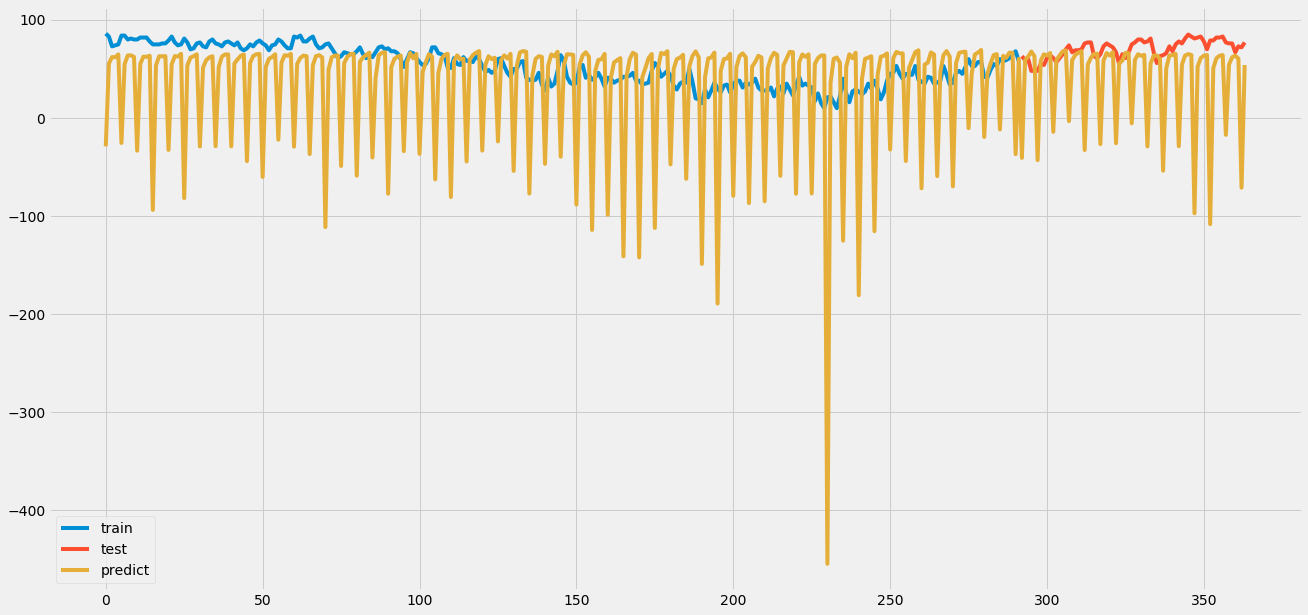

In [13]:
from keras.models import Sequential
from keras import optimizers
from keras import layers

mask_value = -9999

nn = Sequential()
nn.add(layers.Masking(mask_value=mask_value, input_shape=(NUM_DAYS, NUM_FEATURES)))
nn.add(layers.LSTM(50, activation='tanh', input_shape=(NUM_DAYS, NUM_FEATURES), return_sequences=True))

nn.add(layers.TimeDistributed(layers.Dense(10, activation='relu')))
nn.add(layers.TimeDistributed(layers.Dense(1, activation='tanh')))
# nn.add(layers.TimeDistributed(layers.Dense(1, activation='linear')))
nn.compile(loss='mae', optimizer='rmsprop')

model = RNNMultiple(analysis, nn, num_days=NUM_DAYS, mask_value=mask_value)
analysis.run_model(model, name='RNNMultiple')

## Recurrent Neural Network Complete Sequence

Complete sequence means that the entire sequence is input into the network and each timestep produces an output.  There are no batches, just one long sequence.

D:\Users\fjd10\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Train on 1 samples, validate on 1 samples
Epoch 1/10
 - 2s - loss: 0.0993 - val_loss: 0.0589
Epoch 2/10
 - 1s - loss: 0.0519 - val_loss: 0.0427
Epoch 3/10
 - 1s - loss: 0.0313 - val_loss: 0.0310
Epoch 4/10
 - 1s - loss: 0.0243 - val_loss: 0.0248
Epoch 5/10
 - 1s - loss: 0.0194 - val_loss: 0.0191
Epoch 6/10
 - 1s - loss: 0.0147 - val_loss: 0.0163
Epoch 7/10
 - 1s - loss: 0.0119 - val_loss: 0.0142
Epoch 8/10
 - 1s - loss: 0.0097 - val_loss: 0.0123
Epoch 9/10
 - 1s - loss: 0.0085 - val_loss: 0.0107
Epoch 10/10
 - 1s - loss: 0.0075 - val_loss: 0.0092


'Train Error: 67.150349574  Num NaN: 0'

'Test Error: 93.0696955497    Num NaN: 0'

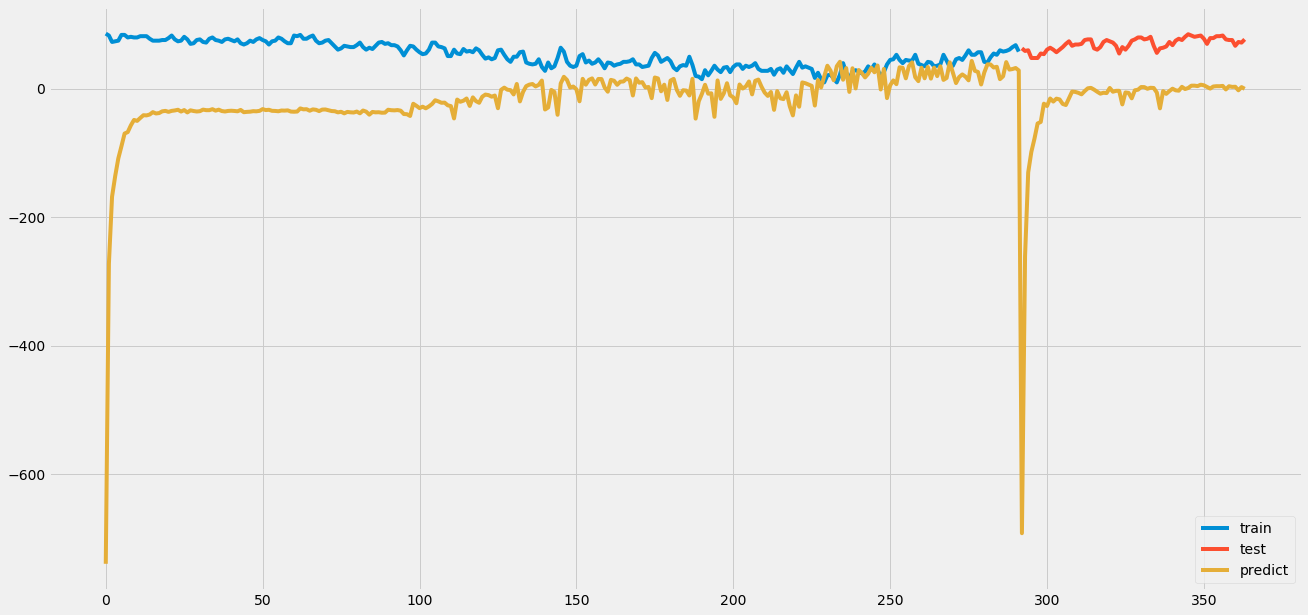

In [14]:
from keras.models import Sequential
from keras import optimizers
from keras import layers

mask_value = -9999

nn = Sequential()
nn.add(layers.Masking(mask_value=mask_value, input_shape=(len(analysis.x_train), NUM_FEATURES)))
nn.add(layers.LSTM(50, activation='tanh', input_shape=(len(analysis.x_train), NUM_FEATURES), return_sequences=True))

nn.add(layers.TimeDistributed(layers.Dense(10, activation='relu')))
nn.add(layers.TimeDistributed(layers.Dense(1, activation='tanh')))
# nn.add(layers.TimeDistributed(layers.Dense(1, activation='linear')))
nn.compile(loss='mae', optimizer='rmsprop')

model = RNNAll(analysis, nn, mask_value=mask_value)
analysis.run_model(model, name='RNNAll')